In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
import datetime

In [63]:
df = yf.download(tickers=['TATAMOTORS.NS'], start = '2024-10-14', end = '2024-10-19', interval="1m")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-10-14 09:15:00+05:30,930.000000,931.500000,930.000000,931.150024,931.150024,0
2024-10-14 09:16:00+05:30,931.150024,932.549988,930.750000,932.000000,932.000000,47916
2024-10-14 09:17:00+05:30,931.400024,933.000000,931.049988,932.549988,932.549988,41334
2024-10-14 09:18:00+05:30,932.849976,934.299988,932.799988,933.549988,933.549988,47370
2024-10-14 09:19:00+05:30,934.049988,934.900024,933.700012,934.900024,934.900024,25898
...,...,...,...,...,...,...
2024-10-18 15:25:00+05:30,910.599976,911.049988,910.250000,911.000000,911.000000,28913
2024-10-18 15:26:00+05:30,911.200012,911.200012,910.500000,910.549988,910.549988,22984
2024-10-18 15:27:00+05:30,910.849976,911.000000,910.200012,910.900024,910.900024,20913


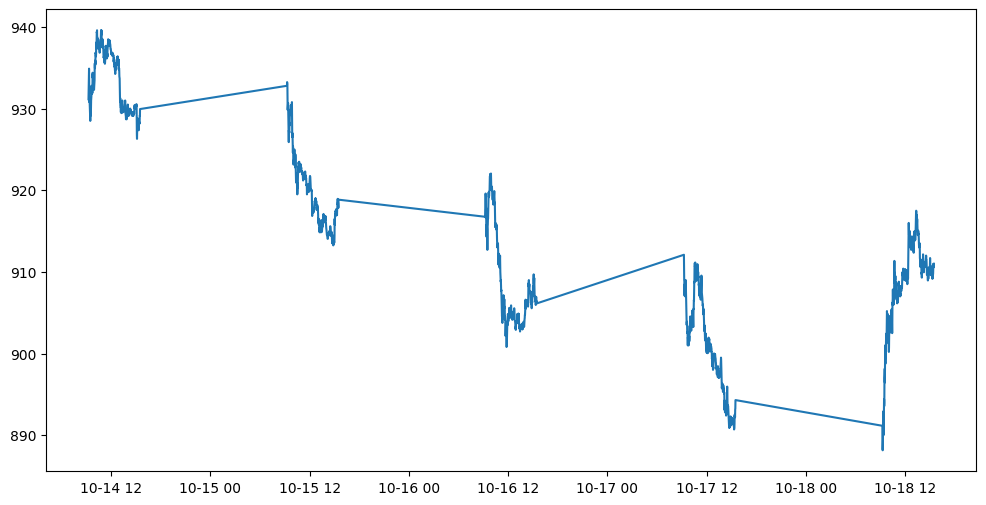

In [64]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)

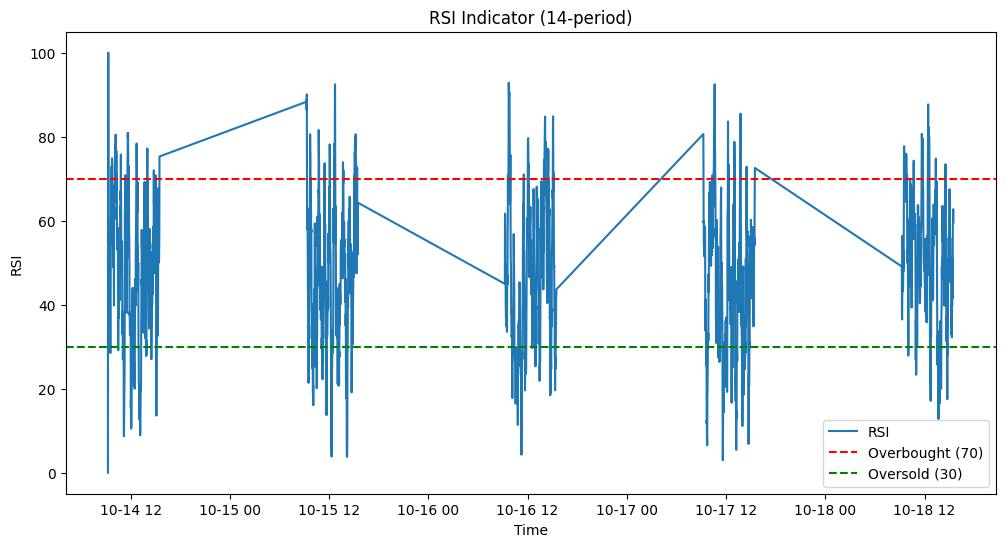

In [65]:
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    
    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # Calculate the rolling averages of gains and losses
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    
    # Calculate the Relative Strength (RS)
    rs = avg_gain / (avg_loss + 1e-10)  # Adding a small constant to avoid division by zero
    
    # Calculate the RSI
    rsi_14 = 100 - (100 / (1 + rs))
    
    # Append columns for avg_gain, avg_loss, RS, and RSI_14
    df['avg_gain'] = avg_gain
    df['avg_loss'] = avg_loss
    df['RS'] = rs
    df['RSI_14'] = rsi_14
    df['RSI'] = rsi_14  # Same as RSI for clarity
    
    return df

# Example Data (replace with your own DataFrame with 'close' prices)
# df = pd.DataFrame({'time': ..., 'close': ...})  # Replace with your actual data

# Calculate RSI (with 14-day period)
df = calculate_rsi(df)

# Plotting the RSI with thresholds 70 and 30
plt.figure(figsize=(12, 6))
plt.plot(df['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.xlabel('Time')
plt.ylabel('RSI')
plt.title('RSI Indicator (14-period)')
plt.legend()
plt.show()


In [66]:
df

,Open,High,Low,Close,Adj Close,Volume,avg_gain,avg_loss,RS,RSI_14,RSI
Datetime,,,,,,,,,,,
2024-10-14 09:15:00+05:30,930.000000,931.500000,930.000000,931.150024,931.150024,0,0.000000,-0.000000,0.000000e+00,0.000000,0.000000
2024-10-14 09:16:00+05:30,931.150024,932.549988,930.750000,932.000000,932.000000,47916,0.424988,-0.000000,4.249878e+09,100.000000,100.000000
2024-10-14 09:17:00+05:30,931.400024,933.000000,931.049988,932.549988,932.549988,41334,0.466654,-0.000000,4.666545e+09,100.000000,100.000000
2024-10-14 09:18:00+05:30,932.849976,934.299988,932.799988,933.549988,933.549988,47370,0.599991,-0.000000,5.999908e+09,100.000000,100.000000
2024-10-14 09:19:00+05:30,934.049988,934.900024,933.700012,934.900024,934.900024,25898,0.750000,-0.000000,7.500000e+09,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-18 15:25:00+05:30,910.599976,911.049988,910.250000,911.000000,911.000000,28913,0.207136,0.146423,1.414637e+00,58.585908,58.585908
2024-10-18 15:26:00+05:30,911.200012,911.200012,910.500000,910.549988,910.549988,22984,0.207136,0.142853,1.449995e+00,59.183597,59.183597
2024-10-18 15:27:00+05:30,910.849976,911.000000,910.200012,910.900024,910.900024,20913,0.221427,0.142853,1.550035e+00,60.784853,60.784853


In [67]:
class Position:
    def __init__(self):
        self.position_type = None  # None, 'buy', 'sell'
        self.entry_price = None    # Price when the position was opened
        self.exit_price = None     # Price when the position was closed
        self.entry_rsi = None      # RSI at the time of opening
        self.exit_rsi = None       # RSI at the time of closing

    def open_buy(self, price, rsi):
        """Open a buy position."""
        self.position_type = 'buy'
        self.entry_price = price
        self.entry_rsi = rsi
        print(f"Opened BUY position at price {price} and RSI {rsi}.")

    def open_sell(self, price, rsi):
        """Open a sell position."""
        self.position_type = 'sell'
        self.entry_price = price
        self.entry_rsi = rsi
        print(f"Opened SELL position at price {price} and RSI {rsi}.")

    def close_position(self, price, rsi):
        """Close the current position."""
        self.exit_price = price
        self.exit_rsi = rsi
        profit_loss = self.exit_price - self.entry_price if self.position_type == 'buy' else self.entry_price - self.exit_price
        print(f"Closed {self.position_type.upper()} position at price {price} and RSI {rsi}. P/L: {profit_loss:.2f}")

        # Store the trade details in case of a valid exit
        trade_info = {
            'position_type': self.position_type,
            'entry_price': self.entry_price,
            'exit_price': self.exit_price,
            'entry_rsi': self.entry_rsi,
            'exit_rsi': self.exit_rsi,
            'profit_loss': profit_loss
        }

        # Reset the position after storing trade info
        self.position_type = None
        self.entry_price = None
        self.exit_price = None
        self.entry_rsi = None
        self.exit_rsi = None

        return trade_info  # Return the trade info for tracking

    def update(self, price, rsi):
        """Update the position based on the RSI value."""
        closed_trade = None  # Initialize variable to hold closed trade info
        print(f"Current price: {price}, RSI: {rsi}, Position: {self.position_type}")
        
        if self.position_type is None:
            # Open a buy position if RSI is below 30
            if rsi <= 30:
                self.open_buy(price, rsi)
            # Open a sell position if RSI is above 70
            elif rsi >= 70:
                self.open_sell(price, rsi)
        elif self.position_type == 'buy':
            # Close buy position if RSI goes above 70
            if rsi >= 70:
                closed_trade = self.close_position(price, rsi)
        elif self.position_type == 'sell':
            # Close sell position if RSI goes below 30
            if rsi <= 30:
                closed_trade = self.close_position(price, rsi)

        return closed_trade  # Only return closed trade info


Current price: 931.1500244140625, RSI: 0.0, Position: None
Opened BUY position at price 931.1500244140625 and RSI 0.0.
Current price: 932.0, RSI: 99.99999997646991, Position: buy
Closed BUY position at price 932.0 and RSI 99.99999997646991. P/L: 0.85
Current price: 932.5499877929688, RSI: 99.99999997857087, Position: None
Opened SELL position at price 932.5499877929688 and RSI 99.99999997857087.
Current price: 933.5499877929688, RSI: 99.99999998333308, Position: sell
Current price: 934.9000244140625, RSI: 99.99999998666667, Position: sell
Current price: 932.7999877929688, RSI: 64.10216281542301, Position: sell
Current price: 930.7999877929688, RSI: 47.77047777826949, Position: sell
Current price: 930.7999877929688, RSI: 47.77047777766094, Position: sell
Current price: 931.0, RSI: 49.0681769878117, Position: sell
Current price: 930.5499877929688, RSI: 46.470398156310836, Position: sell
Current price: 930.0, RSI: 43.64630823068729, Position: sell
Current price: 930.0, RSI: 43.64630823020

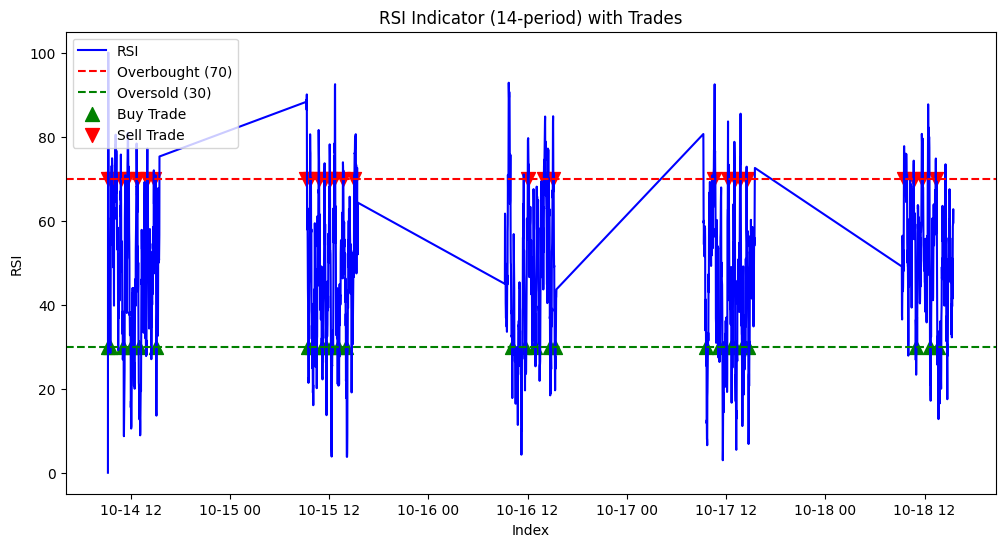

In [68]:
class Backtest:
    def __init__(self):
        self.trades = []

    def execute(self, df):
        position = Position()
        
        for index, row in df.iterrows():
            price = row['Close']
            rsi = row['RSI']
            
            closed_trade = position.update(price, rsi)

            # Track trades
            if closed_trade is not None:
                self.trades.append(closed_trade)  # Append closed trade info directly

        return self.generate_summary()

    def generate_summary(self):
        total_trades = len(self.trades)
        total_profit = sum([trade['profit_loss'] for trade in self.trades])
        avg_profit_per_trade = total_profit / total_trades if total_trades > 0 else 0
        winners = len([trade for trade in self.trades if trade['profit_loss'] > 0])
        losers = len([trade for trade in self.trades if trade['profit_loss'] <= 0])
        
        return {
            'total_trades': total_trades,
            'total_profit': total_profit,
            'avg_profit_per_trade': avg_profit_per_trade,
            'winners': winners,
            'losers': losers,
            'win_rate': winners / total_trades * 100 if total_trades > 0 else 0
        }

# Function to calculate RSI
def calculate_rsi(df, period=14):
    delta = df['Close'].diff()
    
    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    # Calculate the rolling averages of gains and losses
    avg_gain = gain.rolling(window=period, min_periods=1).mean()
    avg_loss = loss.rolling(window=period, min_periods=1).mean()
    
    # Calculate the Relative Strength (RS)
    rs = avg_gain / (avg_loss + 1e-10)  # Adding a small constant to avoid division by zero
    
    # Calculate the RSI
    rsi_14 = 100 - (100 / (1 + rs))
    
    # Append columns for avg_gain, avg_loss, RS, and RSI_14
    df['avg_gain'] = avg_gain
    df['avg_loss'] = avg_loss
    df['RS'] = rs
    df['RSI_14'] = rsi_14
    df['RSI'] = rsi_14  # Same as RSI for clarity
    
    return df

# Main execution
# Assume 'df' is your DataFrame containing 'time' and 'close' columns
df = calculate_rsi(df)

# Initialize and run the backtest
backtest = Backtest()
backtest_results = backtest.execute(df)

# Output the backtest results
print("Backtest Results:")
print(f"Total Trades: {backtest_results['total_trades']}")
print(f"Total Profit: {backtest_results['total_profit']:.2f}")
print(f"Average Profit per Trade: {backtest_results['avg_profit_per_trade']:.2f}")
print(f"Win Rate: {backtest_results['win_rate']:.2f}%")
print(f"Winners: {backtest_results['winners']}")
print(f"Losers: {backtest_results['losers']}")

# Plot RSI and trades
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RSI'], label='RSI', color='blue')  # Use df.index for x-axis
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

# Mark trades on the plot
for trade in backtest.trades:
    entry_index = df[(df['Close'] == trade['entry_price']) & (df['RSI'] == trade['entry_rsi'])].index[0]
    if trade['position_type'] == 'buy':
        plt.scatter(entry_index, 30, marker='^', color='green', label='Buy Trade' if 'Buy Trade' not in plt.gca().get_legend_handles_labels()[1] else "", s=100)
    else:
        plt.scatter(entry_index, 70, marker='v', color='red', label='Sell Trade' if 'Sell Trade' not in plt.gca().get_legend_handles_labels()[1] else "", s=100)

plt.xlabel('Index')  # Change label to Index
plt.ylabel('RSI')
plt.title('RSI Indicator (14-period) with Trades')
plt.legend()
plt.show()


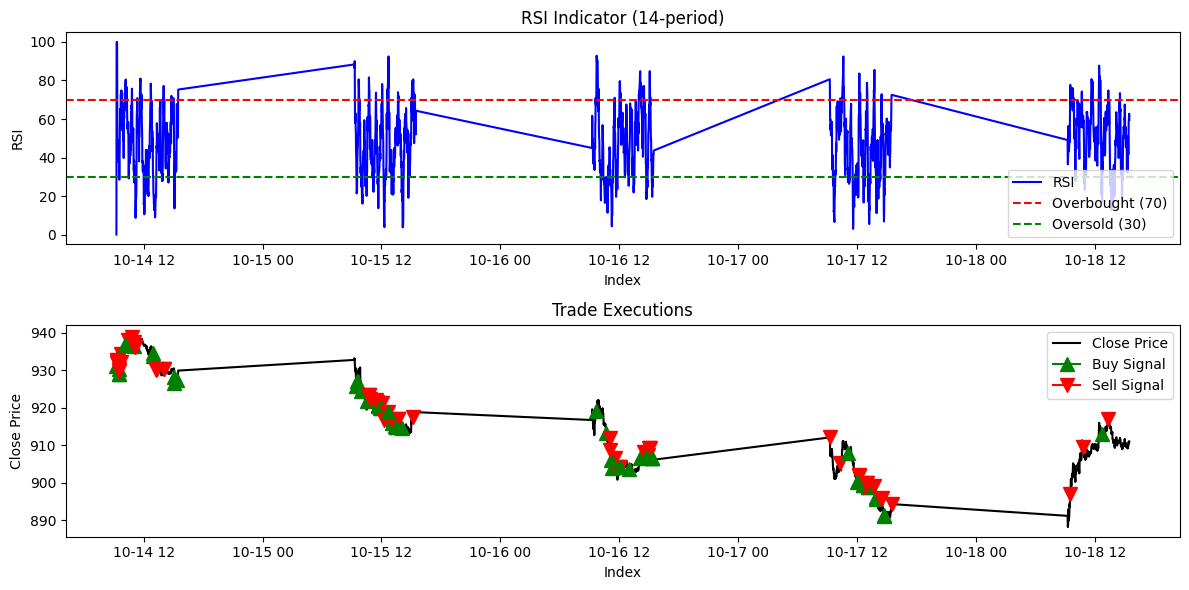

In [69]:
# Plot RSI and trades (optional)
plt.figure(figsize=(12, 6))

# Plot RSI
plt.subplot(2, 1, 1)
plt.plot(df.index, df['RSI'], label='RSI', color='blue')  # Use DataFrame index for x-axis
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.xlabel('Index')  # Change label to Index
plt.ylabel('RSI')
plt.title('RSI Indicator (14-period)')
plt.legend()

# Plot trades
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Close'], label='Close Price', color='black')  # Use DataFrame index for x-axis
plt.xlabel('Index')  # Change label to Index
plt.ylabel('Close Price')
plt.title('Trade Executions')

# Mark trades
for trade in backtest.trades:
    entry_index = df[df['Close'] == trade['entry_price']].index[0]  # Get entry index
    exit_index = df[df['Close'] == trade['exit_price']].index[0]  # Get exit index

    if trade['position_type'] == 'buy':
        plt.plot(entry_index, trade['entry_price'], marker='^', color='green', markersize=10, label='Buy Signal' if 'Buy Signal' not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.plot(exit_index, trade['exit_price'], marker='v', color='red', markersize=10, label='Sell Signal' if 'Sell Signal' not in plt.gca().get_legend_handles_labels()[1] else "")
    elif trade['position_type'] == 'sell':
        plt.plot(entry_index, trade['entry_price'], marker='v', color='red', markersize=10, label='Sell Signal' if 'Sell Signal' not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.plot(exit_index, trade['exit_price'], marker='^', color='green', markersize=10, label='Buy Signal' if 'Buy Signal' not in plt.gca().get_legend_handles_labels()[1] else "")

plt.legend()
plt.tight_layout()
plt.show()
